## Keras validation

### Fashion MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('fashion-mnist_train.csv',delimiter=',',skip_header=1)

In [3]:
data.shape

(60000, 785)

In [4]:
X = data[:,1:].reshape(-1,28,28,1)

y = np.zeros(shape=(len(data),10),dtype=int)
y[np.arange(len(data)),data[:,0].astype(int)] = 1

X.shape,y.shape

((60000, 28, 28, 1), (60000, 10))

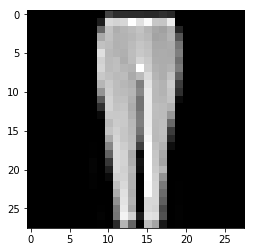

In [5]:
i = np.random.randint(len(X))

plt.imshow(X[i].reshape((28,28)),cmap='gray')
plt.show()

In [6]:
from keras.models import Model
from keras.layers import Input, Dense, Convolution2D, Flatten, MaxPooling2D, Dropout

Using TensorFlow backend.


### Option 1

In [7]:
input_layer = Input(shape=(28,28,1))
conv1 = Convolution2D(16, kernel_size=3,activation='relu')(input_layer)
conv2 = Convolution2D(32, kernel_size=3,activation='relu')(conv1)
pool = MaxPooling2D()(conv2)
hidden = Dense(128,activation='relu')(Flatten()(pool))
drop = Dropout(rate=0.5)(hidden)
output = Dense(10, activation='softmax')(drop)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(X,y,epochs=5,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 98s 2ms/step - loss: 0.3230 - acc: 0.9491 - val_loss: 0.0699 - val_acc: 0.9712
Epoch 2/5
48000/48000 [==============================] - 92s 2ms/step - loss: 0.0735 - acc: 0.9706 - val_loss: 0.0617 - val_acc: 0.9749
Epoch 3/5
48000/48000 [==============================] - 94s 2ms/step - loss: 0.0656 - acc: 0.9737 - val_loss: 0.0595 - val_acc: 0.9761
Epoch 4/5
48000/48000 [==============================] - 94s 2ms/step - loss: 0.0604 - acc: 0.9755 - val_loss: 0.0590 - val_acc: 0.9760
Epoch 5/5
48000/48000 [==============================] - 91s 2ms/step - loss: 0.0564 - acc: 0.9774 - val_loss: 0.0570 - val_acc: 0.9779


### Option 2

In [9]:
# the actual split can be done with any tool
mask = np.zeros(shape=len(X),dtype=bool)
mask[np.random.choice(np.arange(len(X)),size=int(0.8*len(X)),replace=False)] = 1
X_train = X[mask]
X_val = X[~mask]
y_train = y[mask]
y_val = y[~mask]

In [12]:
# rest model weights
input_layer = Input(shape=(28,28,1))
conv1 = Convolution2D(16, kernel_size=3,activation='relu')(input_layer)
conv2 = Convolution2D(32, kernel_size=3,activation='relu')(conv1)
pool = MaxPooling2D()(conv2)
hidden = Dense(128,activation='relu')(Flatten()(pool))
drop = Dropout(rate=0.5)(hidden)
output = Dense(10, activation='softmax')(drop)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,epochs=5,validation_data=(X_val,y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 81s 2ms/step - loss: 0.4776 - acc: 0.9400 - val_loss: 0.0720 - val_acc: 0.9710
Epoch 2/5
48000/48000 [==============================] - 77s 2ms/step - loss: 0.0750 - acc: 0.9696 - val_loss: 0.0650 - val_acc: 0.9738
Epoch 3/5
48000/48000 [==============================] - 77s 2ms/step - loss: 0.0654 - acc: 0.9737 - val_loss: 0.0598 - val_acc: 0.9766
Epoch 4/5
48000/48000 [==============================] - 78s 2ms/step - loss: 0.0586 - acc: 0.9765 - val_loss: 0.0578 - val_acc: 0.9775
Epoch 5/5
48000/48000 [==============================] - 77s 2ms/step - loss: 0.0550 - acc: 0.9782 - val_loss: 0.0542 - val_acc: 0.9785
